<a href="https://colab.research.google.com/github/limas0209/GS-DataSicence-Pegada-de-Carbono/blob/main/GS_2SM-DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#_Global Solution 2024 - Data Science - Pegada de Carbono - Análise de dados com AI e ML Scikit-learn_
***
##Nesse notebook vamos fazer uma analise de um dataframe sobre pegada de carbono dos países. Vamos elaborar 10 perguntas interessantes e relevantes sobre o dataframe e através de analises responderemos essas perguntas
***
##GRUPO:
###Henrique Lima | RM551528
###Anny Carolina Dias | RM98295
###Augusto Fisco Milreu | RM98245

#_10 perguntas sobre o Data Frame:_
***
###1.Como as emissões totais (Total) evoluíram globalmente ao longo do tempo?
###2.Quais países apresentaram os maiores crescimentos nas emissões totais em um período específico?
###3.Qual é a contribuição relativa de cada fonte de emissão (Coal, Oil, Gas, etc.) por país e ano?
###4.Quais países têm as maiores emissões per capita, e como isso se relaciona com suas emissões totais?
###5.Há correlação entre emissões per capita e dependência de fontes específicas (como petróleo ou carvão)?
###6.Quais regiões têm maior dependência de fontes específicas (como carvão ou gás) e como isso mudou ao longo do tempo?
###7.Quais países conseguiram reduzir significativamente suas emissões totais ou per capita nos últimos anos?
###8.Como as emissões de gases de efeito estufa de países desenvolvidos se comparam com as de países em desenvolvimento?
###9.Qual é a participação de fontes como flaring e cimento nas emissões totais globais?
###10.Existem padrões sazonais ou anomalias específicas em anos ou países que mereçam mais investigação?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install hvplot
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import IsolationForest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 4.0 MB/s eta 0:00:00


In [2]:
co2_df = pd.read_csv('Emissions_by_Country.csv')
co2_df = co2_df.drop(columns='ISO 3166-1 alpha-3')
co2_df = co2_df.dropna()
co2_df = co2_df.drop_duplicates()
co2_df

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
3232,Australia,1990,278.154156,141.879819,88.842090,34.454816,3.462872,7.272496,2.242063,16.315938
3233,Australia,1991,279.528510,146.082840,88.245572,32.786243,3.183033,7.001201,2.229622,16.184767
3234,Australia,1992,284.525345,150.051381,87.916828,33.970472,2.923411,7.303701,2.359551,16.293502
3235,Australia,1993,288.870537,150.098575,90.386578,35.670002,3.004698,7.136743,2.573941,16.383765
3236,Australia,1994,293.696553,151.376241,91.924087,37.032005,3.484276,6.880148,2.999795,16.494706
...,...,...,...,...,...,...,...,...,...,...
63099,Global,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


#Pergunta 1
***
###Para respondermos essa pergunta implementamos um código que vai somar as emissões globais para cada ano, um gráfico de linha mostrará a evolução das emissões ao longo do ano.
###O primeiro passo foi agrupar por ano e depois somar as emissões.
###Como resultado podemos perceber que após 1980 houve um aumento brusco das emissões, isso acontece provalvelmente pela alta demanda que foi surgindo devido a um grande aumento da população mundial, e diversas tecnologias que surgiram e foram demandando cada vez mais energia. A tendência é continuar aumentando de acordo com o gráfico.

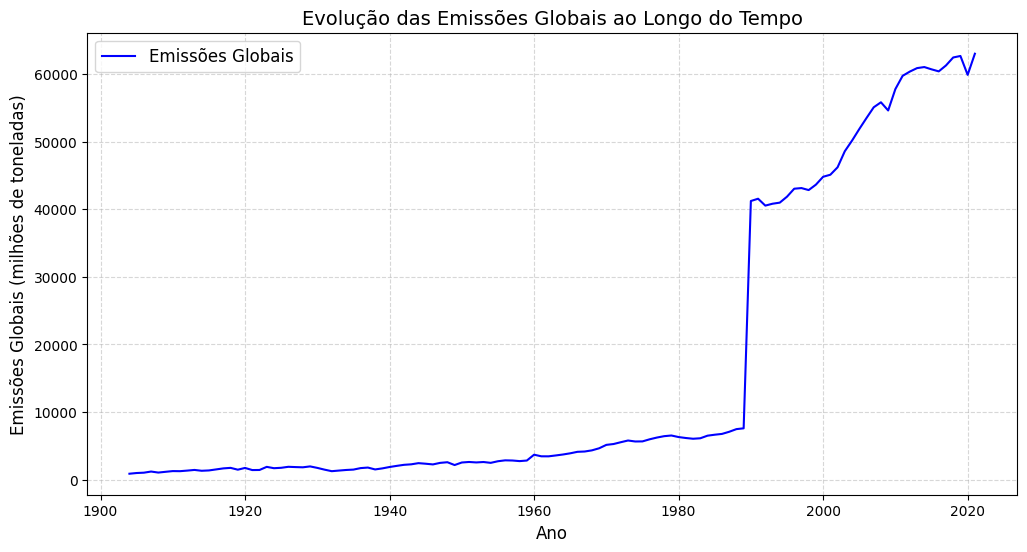

In [ ]:
global_emissions = co2_df.groupby('Year')['Total'].sum().reset_index()
global_emissions.rename(columns={'Total': 'Global Emissions'}, inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(global_emissions['Year'], global_emissions['Global Emissions'], color='blue', label='Emissões Globais')
plt.title('Evolução das Emissões Globais ao Longo do Tempo', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Emissões Globais (milhões de toneladas)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.show()


#Pergunta 2
***
###Nessa pergunta vamos comparar as emissões de dois anos escolhidos no caso: 1990 e 2020, para determinar países com maior crescimento percentual.
###Como resultado podemos concluir que o país com maior crescimento das emissões entre os anos de 1990 e 2020 foi a china, foi um aumento significativo comparado aos outros países. Isso acontece pelo crescimento acelerado da industrialização e população do continente Ásiatico.

In [ ]:
start_year = 1990
end_year = 2020

start_data = co2_df[co2_df['Year'] == start_year][['Country', 'Total']]
end_data = co2_df[co2_df['Year'] == end_year][['Country', 'Total']]

growth = pd.merge(start_data, end_data, on='Country', suffixes=('_start', '_end'))
growth['Growth (%)'] = ((growth['Total_end'] - growth['Total_start']) / growth['Total_start']) * 100

growth = growth.sort_values('Growth (%)', ascending=False).head(10)
print(growth)


        Country   Total_start     Total_end  Growth (%)
7         China   2484.854820  10956.213369  340.919658
42       Turkey    151.664532    413.433085  172.597080
33  South Korea    250.510837    597.634242  138.566223
41       Taiwan    124.079000    264.267187  112.983008
4        Brazil    218.658000    442.306003  102.282104
9        Cyprus      4.653217      7.269578   56.226929
46       Global  22757.480501  35264.085734   54.956019
18      Iceland      2.215856      3.328876   50.229798
0     Australia    278.154156    399.922128   43.777154
29  New Zealand     25.502507     34.456753   35.111238


#Pergunta 3
***
###Para calcularmos a contribuição relativa para cada fonte de emissão de um determinado país por ano, primeiro selecionamos um país para servir como exeplo (Brasil). E como resultado obtivemos que no ano de 2020 o Brasil contribuiu com muita queima de petróleo

In [ ]:
selected_country = 'Brazil'
selected_year = 2020


country_year_data = co2_df[(co2_df['Country'] == selected_country) & (co2_df['Year'] == selected_year)]


if country_year_data.empty:
    print(f"Nenhum dado disponível para {selected_country} no ano {selected_year}.")
else:

    sources = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']
    for source in sources:
        country_year_data[f'{source} (%)'] = (country_year_data[source] / country_year_data['Total']) * 100


    result = country_year_data[['Country', 'Year'] + [f'{src} (%)' for src in sources]]
    print(result)



     Country  Year   Coal (%)    Oil (%)    Gas (%)  Cement (%)  Flaring (%)  \
7614  Brazil  2020  12.715361  63.550893  13.345081    4.985844     3.957667   

      Other (%)  
7614   1.445153  


<ipython-input-40-a96b176c518e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_year_data[f'{source} (%)'] = (country_year_data[source] / country_year_data['Total']) * 100
<ipython-input-40-a96b176c518e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_year_data[f'{source} (%)'] = (country_year_data[source] / country_year_data['Total']) * 100
<ipython-input-40-a96b176c518e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

#Pergunta 4
***
###Nesse código estamos classificando os países pelas emissões per capita e observamos suas emissões totais.
###Como resultado temos Luxemburgo como pioneiro, O motivo pelo qual Luxemburgo aparece frequentemente como o país com maior emissão per capita (emissões por pessoa) está relacionado à forma como essa métrica é calculada e às características econômicas e sociais do país, mesmo com sua pequena população.
###1.Apesar disso, o país tem uma economia altamente desenvolvida e industrializada, com setores como transporte e serviços financeiros muito ativos.
###2.Luxemburgo tradicionalmente teve preços baixos de combustíveis fósseis em comparação com países vizinhos, o que incentiva o consumo de gasolina e diesel, incluindo viagens transfronteiriças.
###3.Muitas das emissões associadas a veículos e transporte são atribuídas ao país, aumentando os números per capita.

In [3]:
per_capita_analysis = co2_df.groupby('Country')[['Per Capita', 'Total']].mean()


top_per_capita = per_capita_analysis.sort_values('Per Capita', ascending=False).head(10)

print(top_per_capita)





                Per Capita        Total
Country                                
Luxembourg       21.668932    10.225530
Australia        17.529567   365.858444
USA              17.185863  3464.931977
Canada           16.726496   543.975890
Kazakhstan       13.406499   226.887863
Estonia          13.175873    18.360712
Czech Republic   11.739911   121.690817
Russia           11.482482  1673.956693
Belgium          10.888287   115.247265
Finland          10.641125    55.960556


#Pergunta 5
***
###Para essa pergunta utilizaremos a correlação estatística para verificar a relação entre as emissões per capita e a porcentagem de emissões de carvão
###Então criamos a coluna Coal (%) para representar a dependência percentual de carvão, usamos o "sns.scatterplot" para mostrar os pontos de dados reais (dependência de carvão e emissões per capita), por ultimo a linha de regressão é plotada usando "sns.lineplot", que mostra as previsões do modelo em relação aos valores reais.
###Cada ponto azul no gráfico representa um país em um determinado ano, com sua dependência de carvão no eixo X e suas emissões per capita no eixo Y. A dispersão indica que os valores são amplamente distribuídos e não seguem uma relação linear forte.
###A linha vermelha indica a melhor linha ajustada para os dados, conforme determinado pelo modelo de regressão linear. O coeficiente de regressão (0.04) sugere que, embora haja uma relação positiva, ela é muito fraca (quase inexistente). Um aumento na dependência de carvão está associado a um aumento mínimo nas emissões per capita.
###Embora exista uma leve tendência de que países mais dependentes de carvão apresentem maiores emissões per capita, a relação é fraca e dispersa. Isso sugere que outros fatores, como políticas ambientais, fontes de energia alternativas e níveis de industrialização, podem influenciar significativamente as emissões per capita, além da dependência de carvão.

Erro médio quadrático: 18.17
Coeficiente de Regressão: 0.04


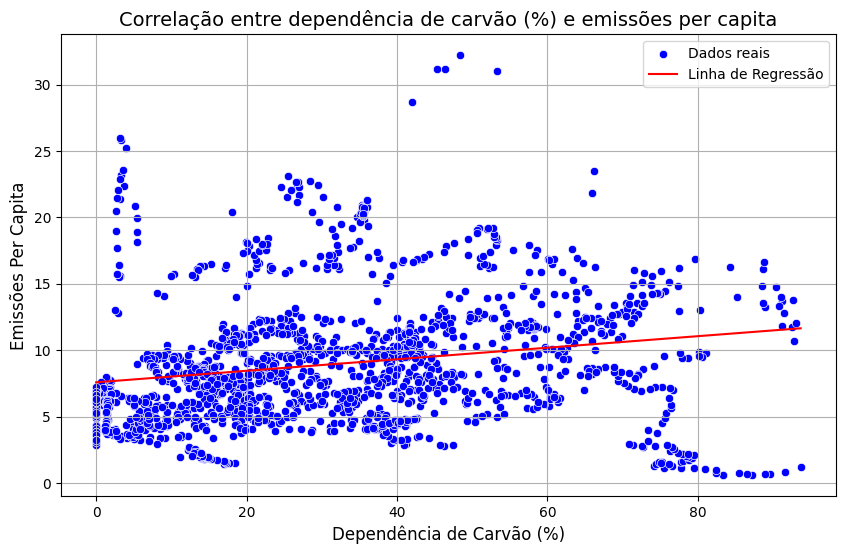

In [ ]:
co2_df['Coal (%)'] = (co2_df['Coal'] / co2_df['Total']) * 100

X = co2_df[['Coal (%)']].dropna()
y = co2_df['Per Capita'].dropna()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Erro médio quadrático: {mse:.2f}")
print(f"Coeficiente de Regressão: {reg.coef_[0]:.2f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Coal (%)'], y=y, label='Dados reais', color='blue')
sns.lineplot(x=X['Coal (%)'], y=reg.predict(X), color='red', label='Linha de Regressão')
plt.title('Correlação entre dependência de carvão (%) e emissões per capita', fontsize=14)
plt.xlabel('Dependência de Carvão (%)', fontsize=12)
plt.ylabel('Emissões Per Capita', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()




#Pergunta 6
***
###Para descobrirmos quais regiões tem a maior dependência de fontes especificas adicionamos manualmente categorias regionais (Ásia, Europa, América) e em seguida analisaremos a dependência média ao longo do tempo.
###Como resultado chegamos a conclusão de que a Ásia foi o continente com a maior submissão de fontes especificas. Isso ocorre por conta da urbanização acelerada, industrialização acelerada, alta demanda energética e pioneira na produção e uso de carvão

In [ ]:
region_dependence = co2_df.groupby(['Region', 'Year'])['Coal'].mean().reset_index()
region_dependence.hvplot.line(x='Year', y='Coal', by='Region', title="Dependência de carvão por região ao longo do tempo")




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 9.4 MB/s eta 0:00:00


:NdOverlay   [Region]
   :Curve   [Year]   (Coal)

#Pergunta 7
***
###Nesse código usaremos o dataset para calcular a diferença nas emissões totais e per capita entre os anos mais recentes e um período anterior (ex.: 2000–2020).
###Como resultado temos os Estados Unidos liderando a redução de emissões poluentes nos ultimos anos, isso se da pelo fato da necessidade de diversificar a matriz energética por fontes mais renováveis. Isso é uma consequência da percepção das pessoas sobre a mudanças clímaticas que estão occorendo ao redor do planeta

In [ ]:
start_year = 2000
end_year = 2020

start_data = co2_df[co2_df['Year'] == start_year][['Country', 'Total', 'Per Capita']]
end_data = co2_df[co2_df['Year'] == end_year][['Country', 'Total', 'Per Capita']]

reduction = pd.merge(start_data, end_data, on='Country', suffixes=('_start', '_end'))
reduction['Total Reduction'] = reduction['Total_start'] - reduction['Total_end']
reduction['Per Capita Reduction'] = reduction['Per Capita_start'] - reduction['Per Capita_end']

reduction = reduction.sort_values('Total Reduction', ascending=False).head(10)
print(reduction[['Country', 'Total Reduction', 'Per Capita Reduction']])


           Country  Total Reduction  Per Capita Reduction
45             USA      1300.659465              7.267249
15         Germany       259.970811              3.355027
44  United Kingdom       242.770517              4.803934
21           Japan       222.370640              1.651342
20           Italy       168.208587              3.178767
14          France       126.797383              2.591810
38           Spain        98.334903              3.145747
43         Ukraine        78.380780              1.124337
16          Greece        47.362890              4.038823
3          Belgium        36.351527              4.529465


#Pergunta 8
***
###Para categorizar, enriquecemos o dataset com informações de desenvolvimento obtidas no Banco Mundial ou fontes semelhantes.
###Como resultado dessa analise, percebemos que os países em desenvolvimento possui maiores emissões de poluentes comparado aos países desenvolvidos, isso se deve pelo aumento gradativo das população, crescimento na demanda energética, investimentos em tecnologias e industrialização

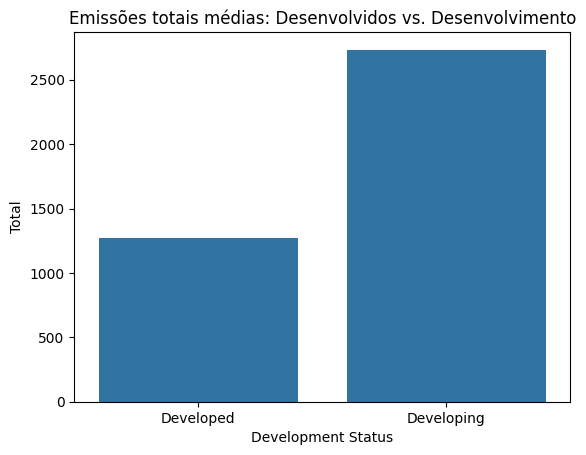

In [ ]:
comparison = co2_df.groupby('Development Status')[['Total', 'Per Capita']].mean().reset_index()
sns.barplot(data=comparison, x='Development Status', y='Total')
plt.title("Emissões totais médias: Desenvolvidos vs. Desenvolvimento")
plt.show()



#Pergunta 9
***
###Nesse código analisaremos a contribuição percentual das fontes Flaring (Queima de gás natural) e Cement (Cimento) nas emissões totais ao longo do tempo.
###Como resultado obtemos que ao longo do tempo a queima de cimento teve uma maior participação nas emissões em relação fontes de queima de gás natural

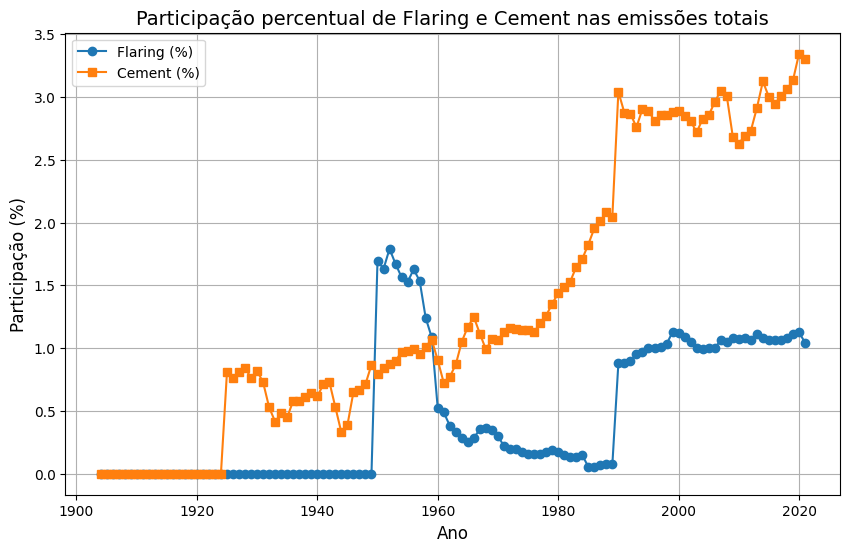

In [ ]:
co2_df['Flaring (%)'] = (co2_df['Flaring'] / co2_df['Total']) * 100
co2_df['Cement (%)'] = (co2_df['Cement'] / co2_df['Total']) * 100

global_share = co2_df.groupby('Year')[['Flaring (%)', 'Cement (%)']].mean()

plt.figure(figsize=(10, 6))
plt.plot(global_share.index, global_share['Flaring (%)'], label='Flaring (%)', marker='o')
plt.plot(global_share.index, global_share['Cement (%)'], label='Cement (%)', marker='s')
plt.title('Participação percentual de Flaring e Cement nas emissões totais', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Participação (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()



#Pergunta 10
***
###Nesse algoritmo de classificação, para detectar anomalias, utilizamos o modelo Isolation Forest do Scikit-learn para identificar anos e países com emissões anômalas.
###Então foi feito uma filtragem e agrupamento de dados por país e por ano para calcular as emissões totais médias anuais.
###O modelo Isolation Forest foi treinado para detectar anomalias. Este algoritmo é útil para identificar valores que se desviam significativamente do padrão.Registros classificados como anômalos pelo modelo (-1) foram filtrados e exibidos. Esses registros correspondem a países e anos cujas emissões se destacaram significativamente do padrão geral.
###Como resultado tivemos que: O país Liechtenstein apresentou valores atípicos com emissões totais extremamente baixas entre 1990 e 1998. Isso reflete o fato de Liechtenstein ser um país pequeno, com uma economia e infraestrutura limitadas, resultando em valores de emissão bem abaixo da média global. Além disso, Global também aparece com anomalias, especialmente em anos recentes (2017-2021), devido a valores extremamente altos nas emissões totais (acima de 36.000 MtCO₂). Isso pode ser explicado pelo aumento de emissões combinado de grandes países emissores.

In [ ]:
features = co2_df[['Year', 'Total']].copy()
features['Log Total'] = np.log(features['Total'] + 1)

model = IsolationForest(contamination=0.05, random_state=42)
features['Anomaly'] = model.fit_predict(features[['Year', 'Log Total']])

anomalies = co2_df[features['Anomaly'] == -1]
print(anomalies[['Country', 'Year', 'Total']])


             Country  Year         Total
32064  Liechtenstein  1990      0.198971
32065  Liechtenstein  1991      0.206329
32066  Liechtenstein  1992      0.206950
32067  Liechtenstein  1993      0.215034
32068  Liechtenstein  1994      0.201111
...              ...   ...           ...
63099         Global  2017  36096.739276
63100         Global  2018  36826.506600
63101         Global  2019  37082.558969
63102         Global  2020  35264.085734
63103         Global  2021  37123.850352

[81 rows x 3 columns]


#Conclusão

#### Análise Exploratória de Emissões de CO₂ por País

Esta análise exploratória dos dados de emissões de CO₂ por país revelou insights importantes sobre as tendências globais e regionais, as contribuições de diferentes fontes de emissão e os desafios na mitigação das mudanças climáticas.

## Principais Conclusões:

- **Crescimento Global nas Emissões:**  
  As emissões globais de CO₂ aumentaram significativamente, particularmente após 1980, impulsionadas principalmente pelo crescimento industrial e populacional.

- **China e o Crescimento nas Emissões:**  
  A China se destacou como o país com maior crescimento percentual nas emissões entre 1990 e 2020.

- **Dependência de Combustíveis Fósseis:**  
  A dependência de combustíveis fósseis, como petróleo e carvão, varia consideravelmente entre os países e regiões, com a Ásia apresentando a maior dependência de carvão.

- **Relação entre Carvão e Emissões Per Capita:**  
  Países com alta dependência de carvão tendem a ter maiores emissões per capita, embora a relação não seja linear e outros fatores também influenciem.

- **Luxemburgo e as Emissões Per Capita:**  
  Luxemburgo se destacou com as maiores emissões per capita devido à sua economia industrializada e preços historicamente baixos de combustíveis fósseis.

- **Redução de Emissões nos Estados Unidos:**  
  Os Estados Unidos lideraram a redução de emissões nos últimos anos, possivelmente impulsionados pela diversificação da matriz energética para fontes renováveis e políticas climáticas mais rigorosas.

- **Emissões em Países em Desenvolvimento:**  
  Países em desenvolvimento apresentaram emissões totais maiores em comparação com países desenvolvidos, refletindo o crescimento industrial e populacional acelerado.

- **Contribuições de Gás Natural e Cimento:**  
  A queima de gás natural (flaring) e a produção de cimento contribuem significativamente para as emissões globais, com a produção de cimento mostrando uma participação mais proeminente ao longo do tempo.

- **Anomalias Detectadas:**  
  Anomalias nas emissões foram identificadas em:
  - **Liechtenstein:** Emissões extremamente baixas devido ao tamanho reduzido e à baixa industrialização.
  - **Globalmente:** Emissões altas em anos recentes, destacando o aumento combinado de grandes emissores.

***

#Referências:

#### Referências

- **Global Carbon Dioxide Emissions Analysis Based on Time Series Visualization**  
  *Frontiers in Physics*: Este artigo discute a tendência de longo prazo das emissões globais de CO₂ e destaca a necessidade de estratégias de mitigação. <https://www.frontiersin.org/journals/physics/articles/10.3389/fphy.2023.1201983/full>

- **CO2 Emissions in 2022 – Analysis**  
  *IEA (International Energy Agency)*: Fornece uma visão abrangente sobre as emissões globais de CO₂ relacionadas à energia em 2022, incluindo fatores que contribuíram para o crescimento das emissões. <https://www.iea.org/reports/co2-emissions-in-2022>

- **CO₂ and Greenhouse Gas Emissions**  
  *Our World in Data*: Oferece dados e insights sobre as emissões de CO₂, seu impacto nas mudanças climáticas e soluções potenciais. <https://ourworldindata.org/co2-and-greenhouse-gas-emissions>

- **Global Research on Carbon Emissions: A Scientometric Review**  
  *MDPI*: Uma revisão das tendências de pesquisa e temas-chave no estudo das emissões de carbono. <https://www.mdpi.com/2071-1050/11/14/3972>
